# Version-6

### Change -Reducing parameters by removing biases

Summary:
- Total parameters: 8026 - 99.43% (22nd epoch)

---


### Install Dependencies 

- To train the following network, we use a framework named Keras.
- Keras provides functions for Convolution layers, Activation layers, MaxPooling layer, etc. so we don't need write code for designing such layers. Instead we can focus on creating better network architecture
- Following lines of code installs Keras on the system

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


### Import Libraries and Modules

In [0]:
# Import Numpy for matrices and multi-dimensional array's processing
import numpy as np

# Import Sequential to write model layer-by-layer in sequence 
from keras.models import Sequential

# Import Flatten layer to flatten feature-map, Dropout to avoid overfitting
from keras.layers import Flatten, Dropout, Activation, BatchNormalization

# Import Convolution layer to perform convolution on the channels, MaxPooling to reduce dimensions of channel
from keras.layers import Convolution2D, MaxPooling2D

# Import np_utils for one-hot-encoding
from keras.utils import np_utils

# Import hand written dataset of numbers from 0-9
from keras.datasets import mnist

### Load the Data
The data is loaded in following variables:

- X_train: Samples used during training the network
- y_train: Corresponding labels for training data
- X_test: Samples used for validation after training the network
- y_test: Corresponding labels for the validation of network's performance

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### Dataset Information and Display Data Sample
- We have 60000 images in training dataset
- We have 10000 images in the testing dataset
- Each image's dimension are 28x28x1

(60000, 28, 28)
(10000, 28, 28)


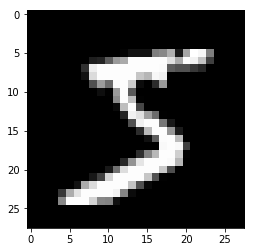

In [0]:
# Dimensions of the training dataset images
print (X_train.shape)

# Dimensions of the testing dataset images
print (X_test.shape)

# Import python module for plotting the image
from matplotlib import pyplot as plt

# Below line is written to display an image in this notebook
%matplotlib inline

# Plotting first image in the training dataset
# cmap='gray' displays the data sample in appropriate color space
plt.imshow(X_train[0], cmap='gray')

### Reshape the dataset
- Keras requires the input data in a form of 4D tensor
- The first value represents the total number of images in a training/testing dataset
- Second and third values are dimensions of an image
- Fourth value is the number of channels (1 for grayscale and 3 for RGB)  

Thus, the X_train will have a shape of (60000, 28, 28, 1)  
and the X_test will have a shape of (1000, 28, 28, 1)

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

### Normalizing the Data
- When a Kernel is convolved over an input image, the maximum pixel value in the feature-map depends upon the maximum pixel value in the kernel
- Different kernels will have different maximum values and so their corresponding feature-maps will have different maximum values
- The feature-map with greater maximum pixel value will be louder while training the network
- To avoid biased activations of such kernels, we perform Normalization
- For normalization, we first convert the data into float so that we can get all the decimal values
- By dividing all the pixels by 255, all the pixel values will be restricted between 0.0 to 1.0. This is how we normalize the data.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

### Print Labels

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

### One-Hot Encoding
- It is way of representing labels
- Instead of using one-single scalar for labels, we use a vector to represent the labels.
- The position of the ground-truth is marked as 1 while other positions are marked as 0
- The network cannot print out the prediction as 0,1,2,....9
- Instead it can activate the neuron associated with these numbers. So, the last layer before activation layer has number of neurons equal to number of classes (in this case 10)
- The neuron associated with the number is set as 1 while other neurons are set as 0. Following is the pattern in which encoding is done:  
  - Number 0 is encoded as 1000000000  
  - Number 1 is encoded as 0100000000  
  - Number 2 is encoded as 0010000000  
   .  
   .  
   .  
   .  
  - Number 9 is encoded as 0000000001

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Print Labels after one-hot encoding

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

### Model Architecture

- Model is defined sequential
- The model has convolution, maxpooling, flatten and softmax layers

- **Convolution Layer:**
  - It is a process of extracting features from a channel using a kernel (feature extractor)
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/5-3ConvolutionSmall.gif?raw=true)

- **MaxPooling Layer:**
  - It reduces the dimension of an channel. If we use MaxPooling of 2x2, dimension of an channel will become half of input channel
  - It only passes the louder pixel value in the next layer
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%203/Files/maxpool.gif?raw=true)

- **Softmax Layer:**
  - It is like probability
  - It gives score of a class between 0 and 1
![](https://github.com/Shilpaj1994/Phase1_assignments/blob/master/Assignment%201/softmax.png?raw=true)

- **Flatten Layer:**
  - It flattens the input dimension
  - Multiple 2D channels are converted into a vector 

In [0]:
# For reproducable results
np.random.seed(7)

drop = 0.2

# Define Sequential Model Type
model = Sequential()

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1), name='conv_1', use_bias=False))   # Layer 1: Input:28x28x01  |  Kernels:(3x3x01)x10  |  Output:26x26x10  |  Receptive Field:3x3 
model.add(BatchNormalization())                                                                               # Layer 2: Batch Normalization
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_2', use_bias=False))                          # Layer 3: Input:26x26x10  |  Kernels:(3x3x10)x10  |  Output:24x24x10  |  Receptive Field:5x5  
model.add(BatchNormalization())                                                                               # Layer 4: Batch Normalization
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_3', use_bias=False))                          # Layer 5: Input:24x24x64  |  Kernels:(3x3x10)x12  |  Output:22x22x12  |  Receptive Field:7x7
model.add(BatchNormalization())                                                                               # Layer 6: Batch Normalization

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_4_1x1', use_bias=False))                      # Layer 7: Input:22x22x12  |  Kernels:(1x1x12)x10  |  Output:22x22x10  |  Receptive Field:7x7 
model.add(MaxPooling2D(2, name='MP'))                                                                         # Layer 8: Input:22x22x10  |    MaxPooling:(2x2)   |  Output:11x11x10  |  Receptive Field:14x14 
model.add(BatchNormalization())                                                                               # Layer 9: Batch Normalization
model.add(Dropout(drop))                                                                                      # Layer 10: Dropout Layer

# Convolution Block
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_5', use_bias=False))                          # Layer 11: Input:11x11x10  |  Kernels:(3x3x10)x10  |  Output:9x9x10  |  Receptive Field:16x16 
model.add(BatchNormalization())                                                                               # Layer 12: Batch Normalization
model.add(Convolution2D(10, 3, 3, activation='relu', name='conv_6', use_bias=False))                          # Layer 13: Input:09x09x10  |  Kernels:(3x3x10)x10  |  Output:7x7x10  |  Receptive Field:18x18 
model.add(BatchNormalization())                                                                               # Layer 14: Batch Normalization
model.add(Convolution2D(12, 3, 3, activation='relu', name='conv_7', use_bias=False))                          # Layer 15: Input:07x07x10  |  Kernels:(3x3x10)x12  |  Output:5x5x12  |  Receptive Field:20x20 
model.add(BatchNormalization())                                                                               # Layer 16: Batch Normalization

# Transition Block
model.add(Convolution2D(10, 1, 1, activation='relu', name='conv_8_1x1', use_bias=False))                      # Layer 17: Input:5x5x12    |  Kernels:(1x1x12)x10  |  Output:5x5x10  |  Receptive Field:22x22
model.add(BatchNormalization())                                                                               # Layer 18: Batch Normalization
model.add(Dropout(drop))                                                                                      # Layer 19: Dropout Layer

# Output Block
model.add(Convolution2D(10, 5, name='conv_9', use_bias=False))                                                # Layer 20: Input:5x5x10   |  Kernels:(5x5x10)x10  |  Output:1x1x10  |  Receptive Field:27x27 
model.add(Flatten())                                                                                          # Layer 21: Input:1x1x10   |  Output:10
model.add(Activation('softmax'))                                                                              # Layer 22: Activation Layer

# Summaries above architecture
model.summary()

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1..., name="conv_1", use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_2", use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_3", use_bias=False)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_4_1x1", use_bias=False)`


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_5", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", name="conv_6", use_bias=False)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(12, (3, 3), activation="relu", name="conv_7", use_bias=False)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_1 (Conv2D)              (None, 26, 26, 10)        90        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
conv_2 (Conv2D)              (None, 24, 24, 10)        900       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
conv_3 (Conv2D)              (None, 22, 22, 12)        1080      
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 12)        48        
_________________________________________________________________
conv_4_1x1 (Conv2D)          (None, 22, 22, 10)        120       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu", name="conv_8_1x1", use_bias=False)`


In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=64, epochs=25, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 14s 229us/step - loss: 0.2140 - acc: 0.9309 - val_loss: 0.0583 - val_acc: 0.9809
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 186us/step - loss: 0.0766 - acc: 0.9763 - val_loss: 0.0398 - val_acc: 0.9868
Epoch 3/25

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 11s 185us/step - loss: 0.0569 - acc: 0.9823 - val_loss: 0.0371 - val_acc: 0.9883
Epoch 4/25

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 11s 184us/step - loss: 0.0484 - acc: 0.9850 - val_loss: 0.0572 - val_acc: 0.9826
Epoch 5/25

Epoch 00005: LearningRateScheduler settin